Seeding


In [ ]:
import random

random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

Importing the dependencies


In [ ]:
import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

Data Curation

In [ ]:
#uploading kaggle json file
!pip install kaggle

In [ ]:
kaggle_credentials = json.load(open("kaggle.json"))

In [ ]:
os.environ["KAGGLE_USERNAME"] = kaggle_credentials["username"]
os.environ["KAGGLE_KEY"] = kaggle_credentials["key"]

In [ ]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0
100% 2.03G/2.04G [00:56<00:00, 15.3MB/s]
100% 2.04G/2.04G [00:56<00:00, 38.4MB/s]


In [ ]:
!ls

drive  kaggle.json  plantvillage-dataset.zip  sample_data


In [ ]:
#Unzipping the file
with ZipFile("plantvillage-dataset.zip", "r") as zipObj:
  zipObj.extractall()

In [ ]:
print(os.listdir("plantvillage dataset"))

print(len(os.listdir("plantvillage dataset/segmented")))
print(os.listdir("plantvillage dataset/segmented")[:5])

print(len(os.listdir("plantvillage dataset/color")))
print(os.listdir("plantvillage dataset/color")[:5])

print(len(os.listdir("plantvillage dataset/grayscale")))
print(os.listdir("plantvillage dataset/grayscale")[:5])

['grayscale', 'segmented', 'color']
38
['Peach___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Apple___Black_rot', 'Tomato___Bacterial_spot', 'Soybean___healthy']
38
['Peach___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Apple___Black_rot', 'Tomato___Bacterial_spot', 'Soybean___healthy']
38
['Peach___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Apple___Black_rot', 'Tomato___Bacterial_spot', 'Soybean___healthy']


Number of Classes = 38

In [ ]:
print(len(os.listdir("plantvillage dataset/color/Grape___healthy")))
print(os.listdir("plantvillage dataset/color/Grape___healthy")[:5])

423
['4b472308-dde6-41b2-943e-707eb5b4b050___Mt.N.V_HL 8942.JPG', '369f23fe-c093-4655-a9f2-0aae0918eb26___Mt.N.V_HL 6102.JPG', 'aca0406e-c5ec-421e-a265-3d88d13b3bef___Mt.N.V_HL 6182.JPG', '9d298426-9f1f-4d43-a568-f38790eaff75___Mt.N.V_HL 9025.JPG', '00e00912-bf75-4cf8-8b7d-ad64b73bea5f___Mt.N.V_HL 6067.JPG']


Data Preprocessing

In [ ]:
base_dir ='plantvillage dataset/color'

In [ ]:
#Image Parameters
img_size = 224
batch_size = 32

Train Test Split

In [ ]:
#Image data generators
data_gen = ImageDataGenerator(rescale=1./255,
                              validation_split=0.2) #using 20% of data for validation

In [ ]:
#Train generator
train_gen = data_gen.flow_from_directory(base_dir,
                                         target_size=(img_size, img_size),
                                         batch_size=batch_size,
                                         subset='training', class_mode = 'categorical')

Found 43456 images belonging to 38 classes.


In [ ]:
#Validation generator
val_gen = data_gen.flow_from_directory(base_dir,
                                         target_size=(img_size, img_size),
                                         batch_size=batch_size,
                                         subset='validation', class_mode = 'categorical')

Found 10849 images belonging to 38 classes.


Convolution Neural Network part

In [ ]:
#Model definition
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(train_gen.num_classes, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#model summary
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │    22,151,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 38)             │         9,766 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,254,438 (84.89 MB)

 Trainable params: 22,254,438 (84.89 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#compile model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Model Training

In [ ]:
#training the model
history = model.fit(train_gen,
                    steps_per_epoch = train_gen.samples//batch_size, #Number of steps per epoch
                    epochs=10, #Number of epochs
                    validation_data=val_gen,
                    validation_steps=val_gen.samples//batch_size #Vlidation steps
                    )

Epoch 1/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 134s 94ms/step - accuracy: 0.3879 - loss: 2.3911 - val_accuracy: 0.7927 - val_loss: 0.7238
Epoch 2/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 130s 95ms/step - accuracy: 0.7350 - loss: 0.8853 - val_accuracy: 0.8476 - val_loss: 0.5143
Epoch 3/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 120s 88ms/step - accuracy: 0.7998 - loss: 0.6505 - val_accuracy: 0.8792 - val_loss: 0.3877
Epoch 4/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 200s 131ms/step - accuracy: 0.8390 - loss: 0.5017 - val_accuracy: 0.8866 - val_loss: 0.3606
Epoch 5/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 143s 105ms/step - accuracy: 0.8726 - loss: 0.3961 - val_accuracy: 0.9042 - val_loss: 0.3003
Epoch 6/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 178s 88ms/step - accuracy: 0.8903 - loss: 0.3379 - val_accuracy: 0.8951 - val_loss: 0.3229
Epoch 7/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 144s 106ms/step - accuracy: 0.9086 - loss: 0.2841 - val_accuracy: 0.9151 - val_loss: 0.2666
Epoch 8/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 201s 105ms/step - accura

Model Evaluation

In [ ]:
val_loss, val_acc = model.evaluate(val_gen, steps=val_gen.samples//batch_size)
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_acc)

339/339 ━━━━━━━━━━━━━━━━━━━━ 23s 68ms/step - accuracy: 0.9146 - loss: 0.2819
Validation Loss: 0.2897346615791321
Validation Accuracy: 0.9108591675758362


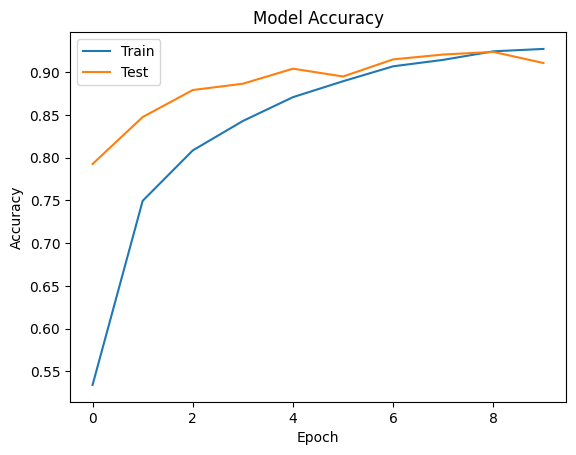

In [ ]:
#plot training & validation accuracy values

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

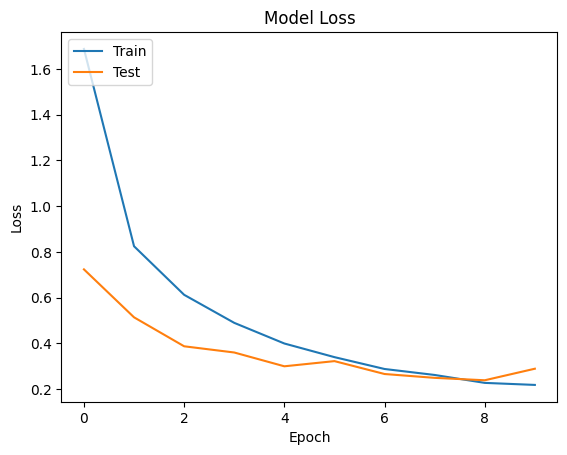

In [ ]:
#plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Building a Predictive System

In [ ]:
#Function to load and preprocess the image using Pillow
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    img = Image.open(image_path)
    img = img.resize((img_size, img_size))
    img_array = np.array(img)
    #Add batch dimensions
    img_array = np.expand_dims(img_array, axis=0)
    #Scale the image values to [0,1]
    img_array = img_array.astype('float32')/255.
    return img_array

def predict_image_class(model, image_path, class_indices):
  preprocessed_img = load_and_preprocess_image(image_path)
  prediction = model.predict(preprocessed_img)
  predicted_class_index = np.argmax(prediction)
  predicted_class_name = class_indices[predicted_class_index]
  return predicted_class_name

In [ ]:
#create a mapping from class indices to class names
class_indices = {v: k for k, v in train_gen.class_indices.items()}

In [ ]:
class_indices

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

In [ ]:
# saving the class names as json file
json.dump(class_indices, open("class_indices.json", "w"))

In [ ]:
#Sample usage of model

image_path = '/content/plantvillage dataset/color/Cherry_(including_sour)___healthy/0008f3d3-2f85-4973-be9a-1b520b8b59fc___JR_HL 4092.JPG'

predict_class_name = predict_image_class(model, image_path, class_indices)
print("Predicted Class:", predict_class_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 939ms/step
Predicted Class: Cherry_(including_sour)___healthy


Saving the model

In [ ]:
model.save('/content/drive/MyDrive/plant_disease_prediction_model2.h5')